#                             **GDG TASK 1**

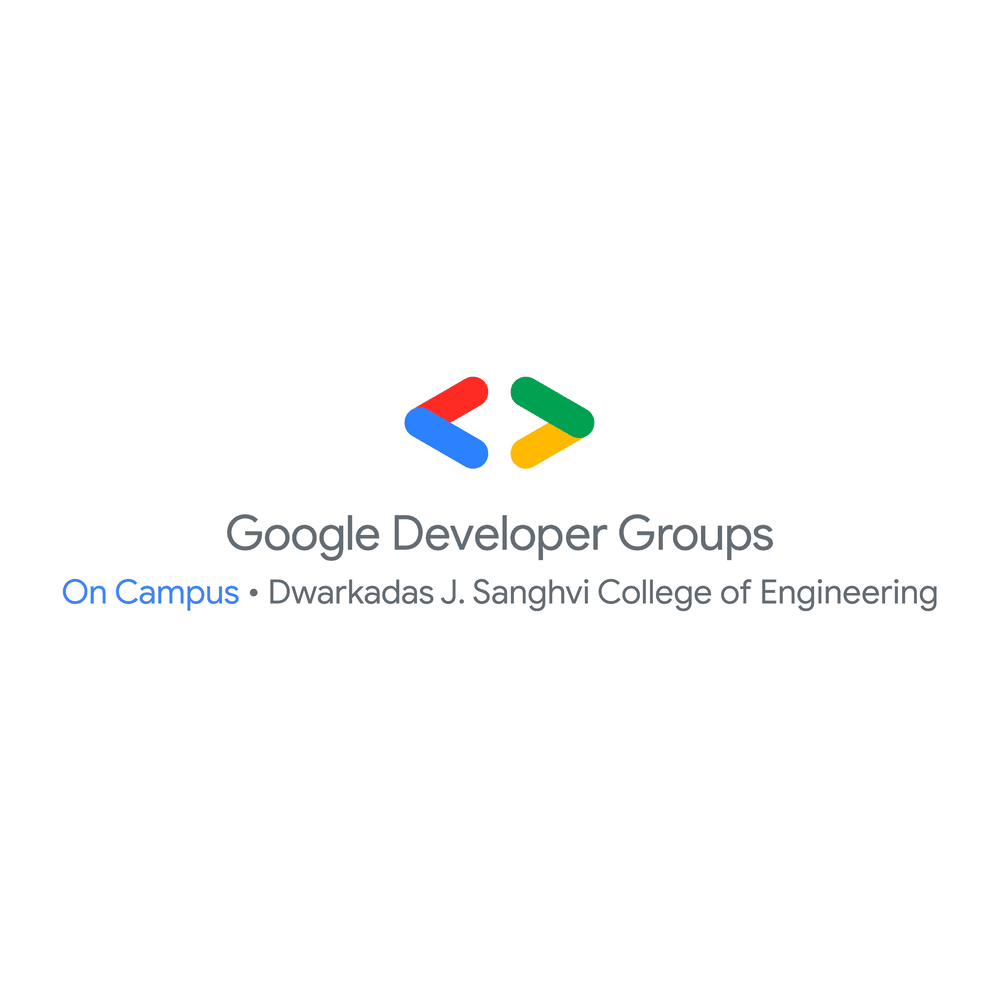

Welcome to GDG!

Your first task in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [16]:
!pip install ydata-profiling -q

Mount your Google Drive onto this notebook.

Import basic libraries.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/file/d/1gHWh61kHVT-tiJxw8DWzNH9UHhCjR95f/view?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [18]:
df = pd.read_csv("Task1.csv")

View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [19]:
df.head(5)

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8

Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [20]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [21]:
df.drop(columns=["id"],inplace = True)
df.head(5)

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   

   Shell Weight  Age  
0      8.348928    9  
1      3.401940    8  
2      6.662133    9  
3     14.996885   11  
4      5.953395    8

Display the the number of rows and columns in this dataset.

In [22]:
df.shape

(74051, 9)

Use the info() function to get, well, info about it.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [24]:
df.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

Write a function to print all the unique values in the columns of Sex and Age.

In [25]:
print(df["Sex"].unique())
print(df["Age"].unique())

['I' 'M' 'F']
[ 9  8 11 10 12  7  5 14  6 13 16  4 18 15 17  3 19 23 21 20 26 22 27 24
 25 29  2  1]


List out the number of crabs belonging to each gender.

In [26]:
df["Sex"].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [27]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [28]:
df = df[df["Height"]!=0]
df["Height"]!=0

0        True
1        True
2        True
3        True
4        True
         ... 
74046    True
74047    True
74048    True
74049    True
74050    True
Name: Height, Length: 74027, dtype: bool

If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [29]:
df.shape

(74027, 9)

#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [30]:
gender_avg = []
unique_gemder = df["Sex"].unique()
for i in unique_gemder:
  sum = 0
  count = 0
  for j in df[df["Sex"]==i]["Age"]:
    sum +=int(j)
    count+=1
  gender_avg.append(sum/count)
print(gender_avg)

[7.602222872184849, 10.89595333037956, 11.341547153411561]


x axis will contain Sex, and y axis has the average age.

Text(0, 0.5, 'Avg Age')

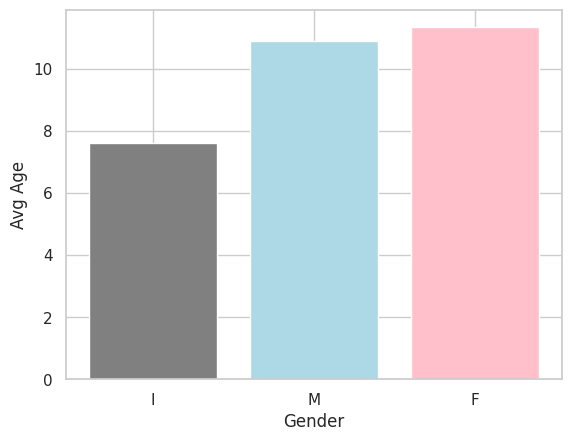

In [31]:
colors = ['grey', 'lightblue', 'pink']
plt.bar(unique_gemder,gender_avg,color=colors)
plt.xlabel("Gender")
plt.ylabel("Avg Age")

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

*`To`* get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



<ipython-input-32-2ffa988b92ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df["Age"],x=df["Sex"],palette=colors)


<Axes: xlabel='Sex', ylabel='Age'>

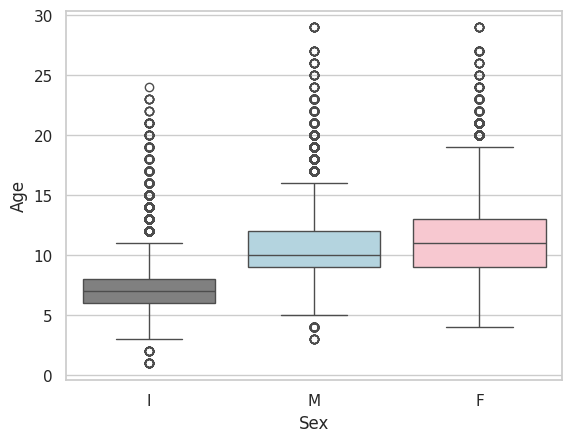

In [32]:
sns.set_style("whitegrid")
sns.boxplot(y=df["Age"],x=df["Sex"],palette=colors)

Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

<Axes: xlabel='Weight', ylabel='Density'>

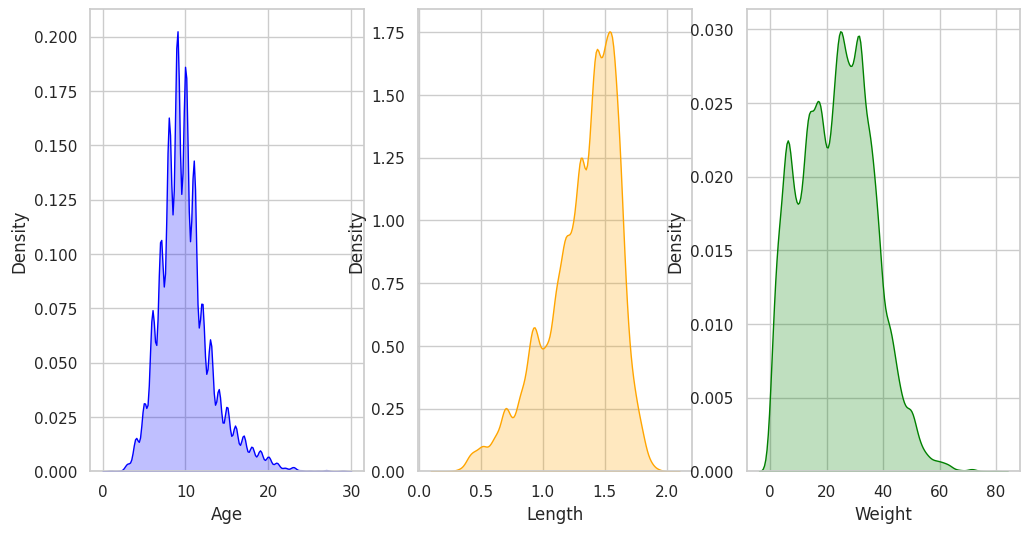

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.kdeplot(df["Age"],color="blue",fill=True)
plt.subplot(1,3,2)
sns.kdeplot(df["Length"],color="orange",fill=True)
plt.subplot(1,3,3)
sns.kdeplot(df["Weight"],color="green",fill=True)

#scatter plots



```
# This is formatted as code
```

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

<Axes: xlabel='Age', ylabel='Diameter'>

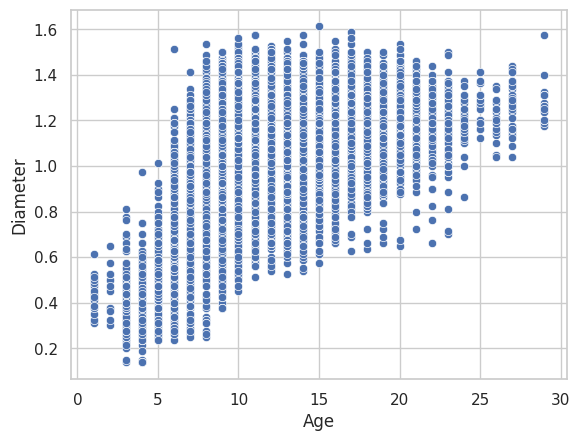

In [34]:
sns.scatterplot(x=df["Age"],y=df["Diameter"])

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [35]:
df[["Shell Weight","Age"]].corr().style.background_gradient(cmap='coolwarm')

If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [36]:
df["Lost Weight"] = df["Weight"] - (df["Shucked Weight"] + df["Viscera Weight"] + df["Shell Weight"])
df["Lost Weight Zero"] = df["Lost Weight"]==0


<ipython-input-36-1c677b852b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lost Weight"] = df["Weight"] - (df["Shucked Weight"] + df["Viscera Weight"] + df["Shell Weight"])
<ipython-input-36-1c677b852b03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Lost Weight Zero"] = df["Lost Weight"]==0


To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

<Axes: xlabel='Lost Weight Zero', ylabel='Age'>

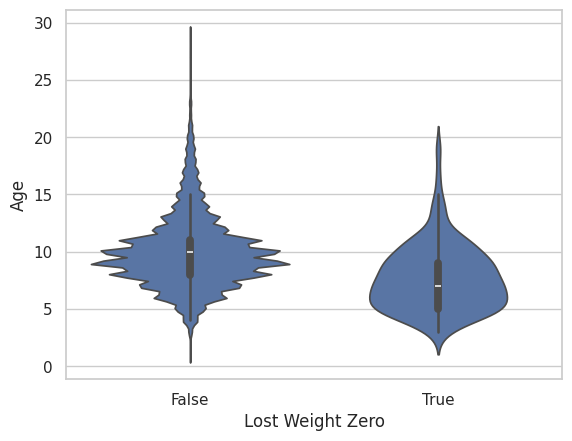

In [37]:
sns.violinplot(x=df["Lost Weight Zero"],y=df["Age"])

#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

<ipython-input-38-f8bcd7d45dfc>:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=dff[dff["Sex"]!="I"], x="Diameter", y="Age", hue="Sex", style="Sex", s=50, palette=palette, alpha=0.6)


<Axes: xlabel='Diameter', ylabel='Age'>

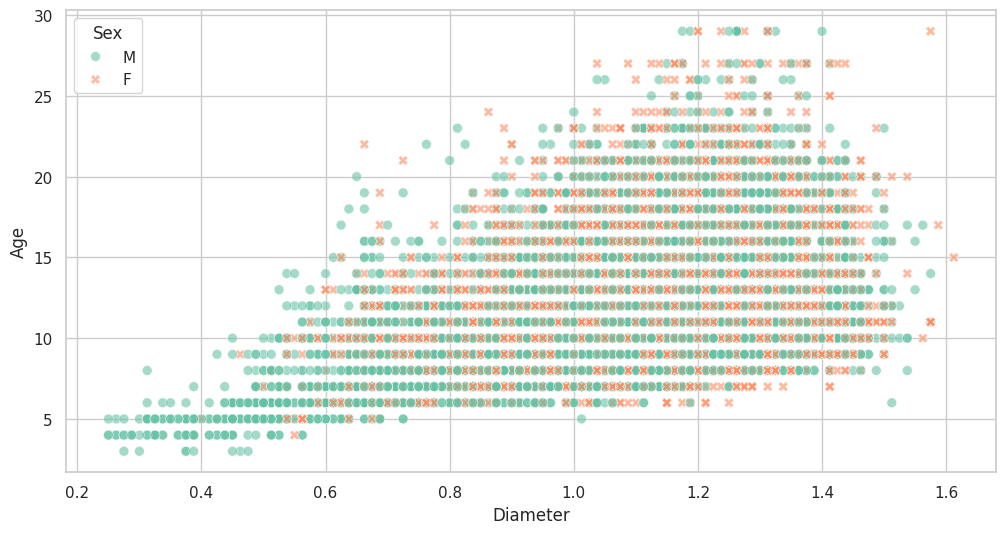

In [38]:
dff = pd.read_csv("Task1.csv")
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dff[dff["Sex"]!="I"], x="Diameter", y="Age", hue="Sex", style="Sex", s=50, palette=palette, alpha=0.6)




```
# This is formatted as code
```

Diameter of F is larger than M at similar ages.
Age is generally proportional to Diameter.

#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [39]:
df = pd.concat([df, pd.get_dummies(df["Sex"], prefix="Sex")], axis=1)
df

Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       I  1.5250    1.1750  0.3750  28.973189       12.728926   
1       I  1.1000    0.8250  0.2750  10.418441        4.521745   
2       M  1.3875    1.1125  0.3750  24.777463       11.339800   
3       F  1.7000    1.4125  0.5000  50.660556       20.354941   
4       I  1.2500    1.0125  0.3375  23.289114       11.977664   
...    ..     ...       ...     ...        ...             ...   
74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  Lost Weight  Lost Weight Zero  \
0            6.647958      8.348928    9     1.247378             False   
1            2.324659      3.401940    8     0.170097             False   
2            5.556502      6.662133    9     1.219029             False   
3           10.991839     14.996885   11     4.316891             False   
4            4.507570      5.953395    8     0.850485             False   
...               ...           ...  ...          ...               ...   
74046       10.361742     12.332033   10     7.285821             False   
74047        2.296310      3.543687    6     0.283495             False   
74048        7.540967      8.079607   10     1.559222             False   
74049        2.919999      4.280774    8     0.595340             False   
74050        1.034757      1.700970    6     0.595339             False   

       Sex_F  Sex_I  Sex_M  
0      False   True  False  
1      False   True  False  
2      False  False   True  
3       True  False  False  
4      False   True  False  
...      ...    ...    ...  
74046   True  False  False  
74047  False   True  False  
74048   True  False  False  
74049  False   True  False  
74050  False   True  False  

[74027 rows x 14 columns]

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [40]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
n_values = norm.fit_transform(df.drop(columns=["Sex","Sex_F", "Sex_M","Sex_I"]))
df_norm = pd.DataFrame(n_values, columns=df.drop(columns=["Sex","Sex_F", "Sex_M","Sex_I"]).columns)


For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [ ]:
df_std = pd.read_csv("crab-e diem. im sorry, couldn't resist. insert appropriate path here.")

Standardise df_std such that the one hot label encoded columns aren't affected.

In [42]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
s_values = stand.fit_transform(df_norm)
df_std = pd.DataFrame(s_values, columns=df_norm.columns)
df_std = pd.concat([df_std, df[["Sex","Sex_F", "Sex_M","Sex_I"]]], axis=1)

#**Compulsory: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. :)**

As we know, machine learning models can only interpret numbers so we need to convert strings and categories into numerical representations that they can understand. There are three primary types of encoding to achieve this transformation: 1) One Hot Encoding, 2) Label Encoding, and 3) Ordinal Encoding.

One Hot Encoding is the most widely used method, particularly for categorical variables that do not have a order or priority.This is also called binary encoding because it assgins 0 for absense and 1 for presense of categories.
Works great with less categories which are of same level and no priority.One column category must be droppped before training as to reduce multicollinearity.

Label Encoding assigns a unique integer to each category. While this method is simple and efficient it can introduce ordinal relationship between categories which may mislead the model into assuming a priority or order that does not exist. Label Encoding is generally used for ordinal categorical variables mainly Target Value where the categories have a meaningful order.